In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error,accuracy_score


# Data Preparation

In [4]:
df = pd.read_csv('../data/processed/crossfit_db.csv')

In [5]:
#removing null values
df = df.dropna()

# Model

In [6]:
scaler = StandardScaler()

In [7]:
drop_features = ['year', 'firstName', 'lastName', 'status', 'gender',
                 'rank_2023_1', 'rank_2023_2', 'rank_2023_3','rank_2023_4',
                 'countryOfOriginCode', 'regionId', 'affiliateId', 'affiliateName',
                 'competitorName', 'countryOfOriginName', 'regionName' ,
                 'overallRank', 'overall_score_2023',
                 'score_reps_2023_1', 'score_reps_2023_2','score_reps_2023_3','score_reps_2023_4', 'score_time_2023_4'
                 ]

X = df.drop(columns=drop_features)
y = df["overall_score_2023"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LassoCV()
model.fit(X_train_scaled, y_train)

LassoCV()

# Evaluate Model

In [8]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind="bar")
    plt.grid(True, axis="y")
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles="dashed");

In [9]:
y_pred = model.predict(X_test_scaled)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

error = mean_absolute_percentage_error(y_pred, y_test)
print("Mean absolute percentage error {0:.2f}%".format(error))

R2: 0.8166120554451921
MAE: 33139.021756449794
RMSE: 47516.92749679373
Mean absolute percentage error 37.56%


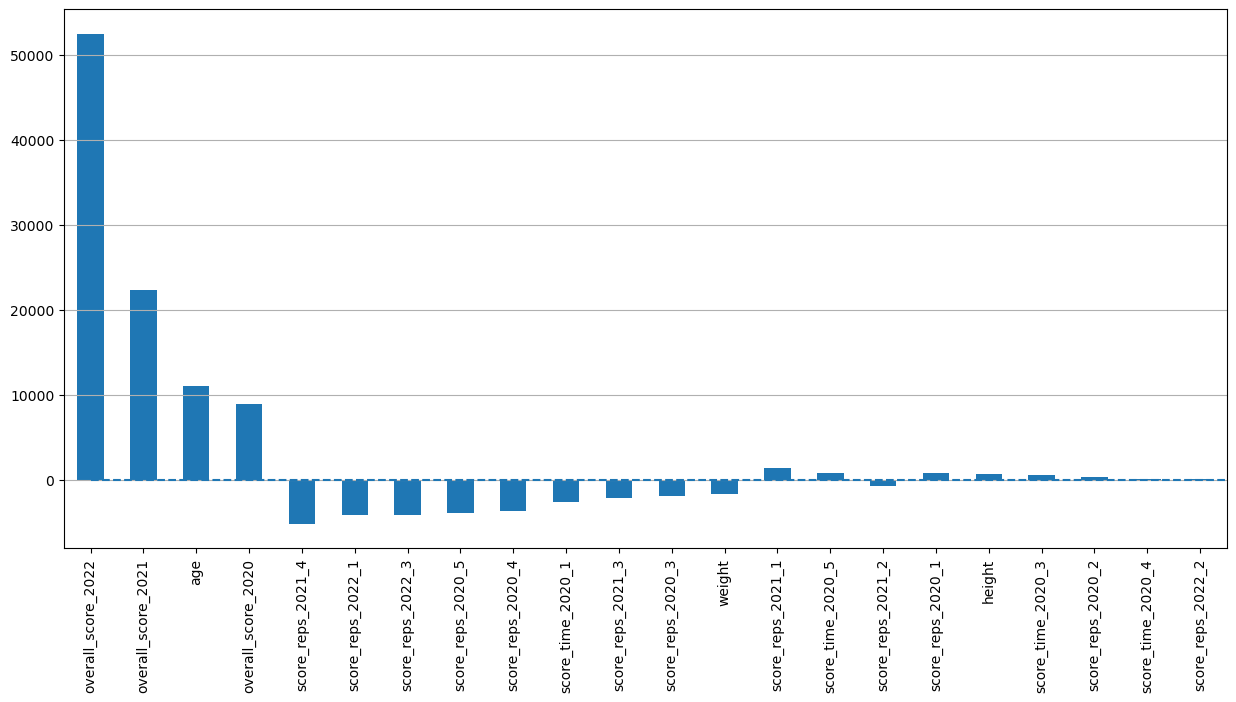

In [10]:
plotCoefficients(model)

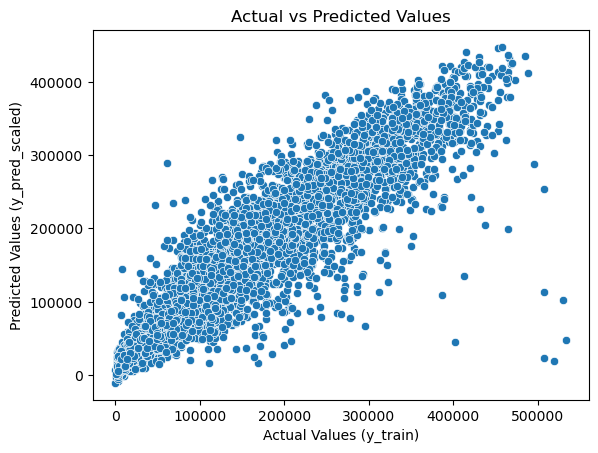

In [11]:
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_scaled)')
plt.show()